In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

full_data = [train_data, test_data]

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


See if we have some missing values in data sets

In [4]:
datasetHasNan = False
if train_data.count().min() == train_data.shape[0] and test_data.count().min() == test_data.shape[0] :
    pass
else:
    datasetHasNan = True
    
#Check for missing data & list them 
if datasetHasNan == True:
    nas = pd.concat([train_data.isnull().sum(), test_data.isnull().sum()], axis=1, 
                    keys=['Train Dataset', 'Test Dataset'], sort=False) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
          Train Dataset  Test Dataset
Age                 177          86.0
Fare                  0           1.0
Cabin               687         327.0
Embarked              2           0.0


Sex column

In [5]:
for data in full_data:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} )
    
sex_pivot = train_data.pivot_table(index='Sex',values='Survived')
sex_pivot

,Survived
Sex,
0,0.188908
1,0.742038


Pclass column

In [6]:
pclass_pivot = train_data.pivot_table(index='Pclass',values='Survived')
pclass_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


SibSp, Parch columns

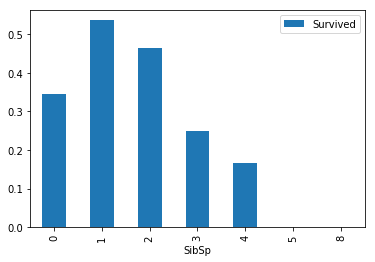

In [7]:
sibsp_chart = train_data.pivot_table(index='SibSp',values='Survived')
sibsp_chart.plot.bar()
plt.show()

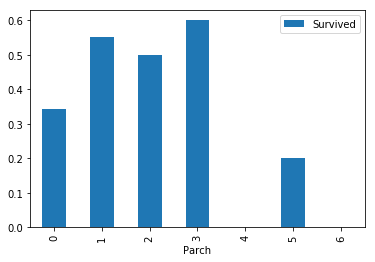

In [8]:
parch_chart = train_data.pivot_table(index='Parch',values='Survived')
parch_chart.plot.bar()
plt.show()

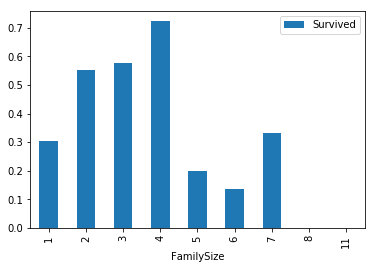

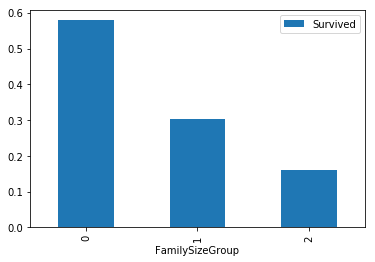

In [9]:
for data in full_data:
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

# Create new feature IsAlone from FamilySize
for data in full_data:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

family_chart = train_data.pivot_table(index='FamilySize',values='Survived')
family_chart.plot.bar()
plt.show()

for data in full_data:
    data['FamilySizeGroup'] = 'Small'
    data.loc[data['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
    data.loc[data['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Big'

for data in full_data:
    data['FamilySizeGroup'] = data['FamilySizeGroup'].map({'Small': 0, 'Alone': 1, 'Big': 2})

famSize_cat_pivot = train_data.pivot_table(index='FamilySizeGroup',values='Survived')
famSize_cat_pivot.plot.bar()
plt.show()

Embarked column

In [10]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

for data in full_data:
    data['Embarked'] = data['Embarked'].map( {'S': 1, 'Q': 2, 'C': 3} )

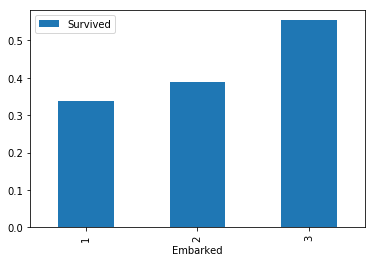

In [12]:
embarked_chart = train_data.pivot_table(index='Embarked',values='Survived')
embarked_chart.plot.bar()
plt.show()

Age column

In [13]:
print(train_data.shape[0])
train_data['Age'].describe()

891


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

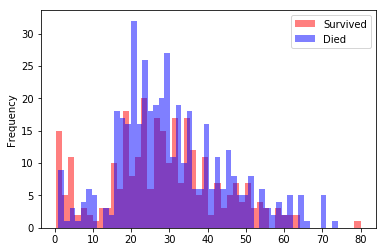

In [14]:
survived = train_data[train_data['Survived'] == 1]
died = train_data[train_data['Survived'] == 0]
survived['Age'].plot.hist(alpha=0.5,color='red',bins=50)
died['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [15]:
train_random_ages = np.random.randint(train_data['Age'].mean() - train_data['Age'].std(),
                                          train_data['Age'].mean() + train_data['Age'].std(),
                                          size = train_data['Age'].isnull().sum())

test_random_ages = np.random.randint(test_data['Age'].mean() - test_data['Age'].std(),
                                          test_data['Age'].mean() + test_data['Age'].std(),
                                          size = test_data['Age'].isnull().sum())

train_data['Age'][np.isnan(train_data['Age'])] = train_random_ages
test_data['Age'][np.isnan(test_data['Age'])] = test_random_ages
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)

for data in full_data:    
    data.loc[ data['Age'] <= 14, 'Age'] = 0
    data.loc[(data['Age'] > 14) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4

pivot_ages = train_data.pivot_table(index = 'Age', values = 'Survived')
pivot_ages


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Survived
Age,
0,0.576923
1,0.364948
2,0.358871
3,0.434783
4,0.090909


In [16]:
train_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FamilySizeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,1,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,3,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,1,2,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,1,1,1,1


Fare column

In [17]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

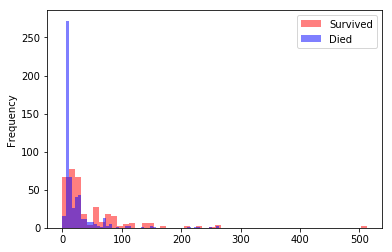

In [19]:
survived = train_data[train_data['Survived'] == 1]
died = train_data[train_data['Survived'] == 0]
survived['Fare'].plot.hist(alpha=0.5,color='red',bins=50)
died['Fare'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [20]:
for data in full_data:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 32), 'Fare']   = 2
    data.loc[ data['Fare'] > 32, 'Fare'] = 3
#     data['Fare'] = data['Fare'].astype(int)

pivot_fare = train_data.pivot_table(index = 'Fare', values = 'Survived')
pivot_fare

,Survived
Fare,
0.0,0.197309
1.0,0.308756
2.0,0.437500
3.0,0.597156


Extract Title from Name column
Do not forget about title Donna that is without . and do not fit the pattern bellow

In [21]:
full_data = [train_data, test_data]

for data in full_data:
    data['Title'] = 'Missing'
    
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
titles = sorted(set([x for x in train_data.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

train_data['Title'] = train_data['Name'].map(lambda x: get_title(x))
train_data['Title'] = train_data.apply(replace_titles, axis=1)

test_data['Title'] = test_data['Name'].map(lambda x: get_title(x))
test_data['Title'] = test_data.apply(replace_titles, axis=1)



Different titles found on the dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']



In [22]:
train_data['Title'] = train_data['Title'].map({'Master': 1, 'Miss': 2, 'Mr': 3, 'Mrs': 4})
test_data['Title'] = test_data['Title'].map({'Master': 1, 'Miss': 2, 'Mr': 3, 'Mrs': 4})

title_cat_pivot = train_data.pivot_table(index='Title',values='Survived')
title_cat_pivot

,Survived
Title,
1,0.575000
2,0.702703
3,0.158192
4,0.777778


Cabin column

In [23]:
for data in full_data:
    # classify Cabin by fare
    data['Cabin'] = data['Cabin'].fillna('X')
    data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0])
    data['Cabin'] = data['Cabin'].replace(['A', 'D', 'E', 'T'], 'M')
    data['Cabin'] = data['Cabin'].replace(['B', 'C'], 'H')
    data['Cabin'] = data['Cabin'].replace(['F', 'G'], 'L')
    data['Cabin'] = data['Cabin'].map({'X': 0, 'L': 1, 'M': 2, 'H': 3}).astype(int) 

cabin_pivot = train_data.pivot_table(index = 'Cabin', values = 'Survived')
cabin_pivot

,Survived
Cabin,
0,0.299854
1,0.588235
2,0.691358
3,0.660377


In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FamilySizeGroup,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0.0,0,2,1,1,1,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0.0,0,1,2,0,0,4
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1.0,0,2,1,1,1,3
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1.0,0,1,1,1,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1.0,0,1,3,0,0,4


In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FamilySizeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0.0,0,1,2,0,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3.0,3,3,2,0,0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1.0,0,1,1,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3.0,3,1,2,0,0,4
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1.0,0,1,1,1,1,3


In [26]:
#save PassengerId for evaluation
train_passenger_id = train_data['PassengerId']
test_passenger_id=test_data['PassengerId']

In [27]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis = 1)

not_concerned_columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'FamilySize']
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

train_data.head()
test_data.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,FamilySizeGroup,Title
0,3,0,2,0.0,0,2,1,1,3
1,3,1,2,0.0,0,1,0,0,4
2,2,0,3,1.0,0,2,1,1,3
3,3,0,1,1.0,0,1,1,1,3
4,3,1,1,1.0,0,1,0,0,4


make additional columns to indicate the category for each current column

In [28]:
def dummy_date(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'IsAlone', 'FamilySizeGroup', 'Title']

train_data = dummy_date(train_data, dummy_columns)
test_data = dummy_date(test_data, dummy_columns)

In [29]:
test_data.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,Age_4,...,Embarked_3,IsAlone_0,IsAlone_1,FamilySizeGroup_0,FamilySizeGroup_1,FamilySizeGroup_2,Title_1,Title_2,Title_3,Title_4
0,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [30]:
train_data.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,...,Embarked_3,IsAlone_0,IsAlone_1,FamilySizeGroup_0,FamilySizeGroup_1,FamilySizeGroup_2,Title_1,Title_2,Title_3,Title_4
0,0,0,0,1,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
2,1,0,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [31]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [32]:
def split_valid_test_data(data, fraction=(0.2)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)
    data_x = data.drop(["Survived"], axis=1)
    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)
    return train_x, train_y, valid_x, valid_y


In [33]:
#Just to see what it does

lb = LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes', 'maybe'])

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [34]:
train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(712, 30)
train_y:(712, 1)
valid_x:(179, 30)
valid_y:(179, 1)


In [35]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [44]:
tf.reset_default_graph()
hidden_units = 10
inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
labels = tf.placeholder(tf.float32, shape=[None, 1])
learning_rate = tf.placeholder(tf.float32)
is_training = tf.Variable(True, dtype=tf.bool)
saver = tf.train.Saver()

epochs = 2000
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.0001
batch_size=16

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

initializer = tf.contrib.layers.xavier_initializer()
fc = tf.layers.dense(inputs, hidden_units, activation=None, kernel_initializer=initializer)
fc = tf.layers.batch_normalization(fc, training=is_training)
fc = tf.nn.relu(fc)
    
logits = tf.layers.dense(fc, 1, activation=None)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted = tf.nn.sigmoid(logits)
correct_pred = tf.equal(tf.round(predicted), labels)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {inputs: train_x,
                    labels: train_y,
                    learning_rate: learning_rate_value,
                    is_training:True
                   }

            train_loss, _, train_acc = sess.run([cost, optimizer, accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {inputs: valid_x,
                        labels: valid_y,
                        is_training:False
                       }
                val_loss, val_acc = sess.run([cost, accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")
    feed={inputs:test_data, is_training:False}
    test_predict=sess.run(predicted,feed_dict=feed)
    

Epoch: 3/2000 Train Loss: 0.8470 Train Acc: 0.3652
Epoch: 3/2000 Validation Loss: 0.7989 Validation Acc: 0.3520
Epoch: 5/2000 Train Loss: 0.8442 Train Acc: 0.3652
Epoch: 5/2000 Validation Loss: 0.7975 Validation Acc: 0.3520
Epoch: 7/2000 Train Loss: 0.8414 Train Acc: 0.3652
Epoch: 7/2000 Validation Loss: 0.7962 Validation Acc: 0.3520
Epoch: 10/2000 Train Loss: 0.8386 Train Acc: 0.3652
Epoch: 10/2000 Validation Loss: 0.7949 Validation Acc: 0.3520
Epoch: 12/2000 Train Loss: 0.8359 Train Acc: 0.3750
Epoch: 12/2000 Validation Loss: 0.7936 Validation Acc: 0.3520
Epoch: 14/2000 Train Loss: 0.8332 Train Acc: 0.3750
Epoch: 14/2000 Validation Loss: 0.7923 Validation Acc: 0.3520
Epoch: 16/2000 Train Loss: 0.8306 Train Acc: 0.3750
Epoch: 16/2000 Validation Loss: 0.7910 Validation Acc: 0.3520
Epoch: 19/2000 Train Loss: 0.8279 Train Acc: 0.3736
Epoch: 19/2000 Validation Loss: 0.7897 Validation Acc: 0.3520
Epoch: 21/2000 Train Loss: 0.8253 Train Acc: 0.3736
Epoch: 21/2000 Validation Loss: 0.7885 Val

Epoch: 166/2000 Validation Loss: 0.7249 Validation Acc: 0.4246
Epoch: 169/2000 Train Loss: 0.6995 Train Acc: 0.6292
Epoch: 169/2000 Validation Loss: 0.7241 Validation Acc: 0.4246
Epoch: 171/2000 Train Loss: 0.6980 Train Acc: 0.6292
Epoch: 171/2000 Validation Loss: 0.7233 Validation Acc: 0.4302
Epoch: 173/2000 Train Loss: 0.6966 Train Acc: 0.6320
Epoch: 173/2000 Validation Loss: 0.7225 Validation Acc: 0.4358
Epoch: 175/2000 Train Loss: 0.6952 Train Acc: 0.6390
Epoch: 175/2000 Validation Loss: 0.7216 Validation Acc: 0.4358
Epoch: 178/2000 Train Loss: 0.6937 Train Acc: 0.6390
Epoch: 178/2000 Validation Loss: 0.7208 Validation Acc: 0.4358
Epoch: 180/2000 Train Loss: 0.6923 Train Acc: 0.6419
Epoch: 180/2000 Validation Loss: 0.7200 Validation Acc: 0.4302
Epoch: 182/2000 Train Loss: 0.6909 Train Acc: 0.6419
Epoch: 182/2000 Validation Loss: 0.7192 Validation Acc: 0.4302
Epoch: 185/2000 Train Loss: 0.6896 Train Acc: 0.6419
Epoch: 185/2000 Validation Loss: 0.7184 Validation Acc: 0.4302
Epoch: 18

Epoch: 330/2000 Train Loss: 0.6163 Train Acc: 0.7177
Epoch: 330/2000 Validation Loss: 0.6732 Validation Acc: 0.6480
Epoch: 332/2000 Train Loss: 0.6153 Train Acc: 0.7177
Epoch: 332/2000 Validation Loss: 0.6726 Validation Acc: 0.6480
Epoch: 335/2000 Train Loss: 0.6144 Train Acc: 0.7289
Epoch: 335/2000 Validation Loss: 0.6720 Validation Acc: 0.6480
Epoch: 337/2000 Train Loss: 0.6135 Train Acc: 0.7289
Epoch: 337/2000 Validation Loss: 0.6713 Validation Acc: 0.6480
Epoch: 339/2000 Train Loss: 0.6125 Train Acc: 0.7289
Epoch: 339/2000 Validation Loss: 0.6707 Validation Acc: 0.6480
Epoch: 341/2000 Train Loss: 0.6116 Train Acc: 0.7289
Epoch: 341/2000 Validation Loss: 0.6701 Validation Acc: 0.6480
Epoch: 344/2000 Train Loss: 0.6107 Train Acc: 0.7303
Epoch: 344/2000 Validation Loss: 0.6695 Validation Acc: 0.6536
Epoch: 346/2000 Train Loss: 0.6098 Train Acc: 0.7303
Epoch: 346/2000 Validation Loss: 0.6689 Validation Acc: 0.6536
Epoch: 348/2000 Train Loss: 0.6089 Train Acc: 0.7303
Epoch: 348/2000 Val

Epoch: 494/2000 Train Loss: 0.5590 Train Acc: 0.7612
Epoch: 494/2000 Validation Loss: 0.6333 Validation Acc: 0.6816
Epoch: 496/2000 Train Loss: 0.5583 Train Acc: 0.7612
Epoch: 496/2000 Validation Loss: 0.6329 Validation Acc: 0.6816
Epoch: 498/2000 Train Loss: 0.5577 Train Acc: 0.7626
Epoch: 498/2000 Validation Loss: 0.6324 Validation Acc: 0.6816
Epoch: 500/2000 Train Loss: 0.5570 Train Acc: 0.7626
Epoch: 500/2000 Validation Loss: 0.6319 Validation Acc: 0.6816
Epoch: 503/2000 Train Loss: 0.5564 Train Acc: 0.7640
Epoch: 503/2000 Validation Loss: 0.6314 Validation Acc: 0.6816
Epoch: 505/2000 Train Loss: 0.5558 Train Acc: 0.7640
Epoch: 505/2000 Validation Loss: 0.6310 Validation Acc: 0.6816
Epoch: 507/2000 Train Loss: 0.5551 Train Acc: 0.7640
Epoch: 507/2000 Validation Loss: 0.6305 Validation Acc: 0.6816
Epoch: 510/2000 Train Loss: 0.5545 Train Acc: 0.7640
Epoch: 510/2000 Validation Loss: 0.6300 Validation Acc: 0.6816
Epoch: 512/2000 Train Loss: 0.5539 Train Acc: 0.7640
Epoch: 512/2000 Val

Epoch: 657/2000 Train Loss: 0.5196 Train Acc: 0.7851
Epoch: 657/2000 Validation Loss: 0.6024 Validation Acc: 0.7039
Epoch: 660/2000 Train Loss: 0.5192 Train Acc: 0.7851
Epoch: 660/2000 Validation Loss: 0.6020 Validation Acc: 0.7039
Epoch: 662/2000 Train Loss: 0.5187 Train Acc: 0.7851
Epoch: 662/2000 Validation Loss: 0.6016 Validation Acc: 0.7039
Epoch: 664/2000 Train Loss: 0.5182 Train Acc: 0.7851
Epoch: 664/2000 Validation Loss: 0.6012 Validation Acc: 0.7039
Epoch: 666/2000 Train Loss: 0.5178 Train Acc: 0.7851
Epoch: 666/2000 Validation Loss: 0.6008 Validation Acc: 0.7039
Epoch: 669/2000 Train Loss: 0.5173 Train Acc: 0.7851
Epoch: 669/2000 Validation Loss: 0.6004 Validation Acc: 0.7039
Epoch: 671/2000 Train Loss: 0.5168 Train Acc: 0.7921
Epoch: 671/2000 Validation Loss: 0.6000 Validation Acc: 0.7039
Epoch: 673/2000 Train Loss: 0.5164 Train Acc: 0.7907
Epoch: 673/2000 Validation Loss: 0.5997 Validation Acc: 0.7039
Epoch: 675/2000 Train Loss: 0.5159 Train Acc: 0.7921
Epoch: 675/2000 Val

Epoch: 821/2000 Train Loss: 0.4899 Train Acc: 0.8174
Epoch: 821/2000 Validation Loss: 0.5771 Validation Acc: 0.7095
Epoch: 823/2000 Train Loss: 0.4896 Train Acc: 0.8174
Epoch: 823/2000 Validation Loss: 0.5768 Validation Acc: 0.7095
Epoch: 825/2000 Train Loss: 0.4892 Train Acc: 0.8174
Epoch: 825/2000 Validation Loss: 0.5765 Validation Acc: 0.7095
Epoch: 828/2000 Train Loss: 0.4889 Train Acc: 0.8174
Epoch: 828/2000 Validation Loss: 0.5762 Validation Acc: 0.7095
Epoch: 830/2000 Train Loss: 0.4885 Train Acc: 0.8174
Epoch: 830/2000 Validation Loss: 0.5759 Validation Acc: 0.7095
Epoch: 832/2000 Train Loss: 0.4882 Train Acc: 0.8174
Epoch: 832/2000 Validation Loss: 0.5756 Validation Acc: 0.7095
Epoch: 835/2000 Train Loss: 0.4878 Train Acc: 0.8174
Epoch: 835/2000 Validation Loss: 0.5753 Validation Acc: 0.7095
Epoch: 837/2000 Train Loss: 0.4875 Train Acc: 0.8174
Epoch: 837/2000 Validation Loss: 0.5750 Validation Acc: 0.7095
Epoch: 839/2000 Train Loss: 0.4872 Train Acc: 0.8174
Epoch: 839/2000 Val

Epoch: 982/2000 Train Loss: 0.4682 Train Acc: 0.8188
Epoch: 982/2000 Validation Loss: 0.5584 Validation Acc: 0.7486
Epoch: 985/2000 Train Loss: 0.4679 Train Acc: 0.8188
Epoch: 985/2000 Validation Loss: 0.5581 Validation Acc: 0.7486
Epoch: 987/2000 Train Loss: 0.4677 Train Acc: 0.8188
Epoch: 987/2000 Validation Loss: 0.5579 Validation Acc: 0.7486
Epoch: 989/2000 Train Loss: 0.4674 Train Acc: 0.8188
Epoch: 989/2000 Validation Loss: 0.5577 Validation Acc: 0.7486
Epoch: 991/2000 Train Loss: 0.4672 Train Acc: 0.8188
Epoch: 991/2000 Validation Loss: 0.5575 Validation Acc: 0.7486
Epoch: 994/2000 Train Loss: 0.4669 Train Acc: 0.8188
Epoch: 994/2000 Validation Loss: 0.5573 Validation Acc: 0.7486
Epoch: 996/2000 Train Loss: 0.4666 Train Acc: 0.8188
Epoch: 996/2000 Validation Loss: 0.5570 Validation Acc: 0.7486
Epoch: 998/2000 Train Loss: 0.4664 Train Acc: 0.8188
Epoch: 998/2000 Validation Loss: 0.5568 Validation Acc: 0.7486
Epoch: 1000/2000 Train Loss: 0.4661 Train Acc: 0.8188
Epoch: 1000/2000 V

Epoch: 1141/2000 Train Loss: 0.4512 Train Acc: 0.8202
Epoch: 1141/2000 Validation Loss: 0.5441 Validation Acc: 0.7486
Epoch: 1144/2000 Train Loss: 0.4510 Train Acc: 0.8202
Epoch: 1144/2000 Validation Loss: 0.5439 Validation Acc: 0.7486
Epoch: 1146/2000 Train Loss: 0.4508 Train Acc: 0.8202
Epoch: 1146/2000 Validation Loss: 0.5437 Validation Acc: 0.7486
Epoch: 1148/2000 Train Loss: 0.4505 Train Acc: 0.8202
Epoch: 1148/2000 Validation Loss: 0.5435 Validation Acc: 0.7486
Epoch: 1150/2000 Train Loss: 0.4503 Train Acc: 0.8202
Epoch: 1150/2000 Validation Loss: 0.5434 Validation Acc: 0.7486
Epoch: 1153/2000 Train Loss: 0.4501 Train Acc: 0.8188
Epoch: 1153/2000 Validation Loss: 0.5432 Validation Acc: 0.7486
Epoch: 1155/2000 Train Loss: 0.4499 Train Acc: 0.8188
Epoch: 1155/2000 Validation Loss: 0.5430 Validation Acc: 0.7486
Epoch: 1157/2000 Train Loss: 0.4497 Train Acc: 0.8188
Epoch: 1157/2000 Validation Loss: 0.5428 Validation Acc: 0.7486
Epoch: 1160/2000 Train Loss: 0.4495 Train Acc: 0.8188
Ep

Epoch: 1300/2000 Train Loss: 0.4382 Train Acc: 0.8188
Epoch: 1300/2000 Validation Loss: 0.5336 Validation Acc: 0.7486
Epoch: 1303/2000 Train Loss: 0.4380 Train Acc: 0.8188
Epoch: 1303/2000 Validation Loss: 0.5334 Validation Acc: 0.7486
Epoch: 1305/2000 Train Loss: 0.4379 Train Acc: 0.8188
Epoch: 1305/2000 Validation Loss: 0.5333 Validation Acc: 0.7486
Epoch: 1307/2000 Train Loss: 0.4377 Train Acc: 0.8188
Epoch: 1307/2000 Validation Loss: 0.5332 Validation Acc: 0.7486
Epoch: 1310/2000 Train Loss: 0.4375 Train Acc: 0.8188
Epoch: 1310/2000 Validation Loss: 0.5331 Validation Acc: 0.7486
Epoch: 1312/2000 Train Loss: 0.4374 Train Acc: 0.8188
Epoch: 1312/2000 Validation Loss: 0.5329 Validation Acc: 0.7486
Epoch: 1314/2000 Train Loss: 0.4372 Train Acc: 0.8188
Epoch: 1314/2000 Validation Loss: 0.5328 Validation Acc: 0.7486
Epoch: 1316/2000 Train Loss: 0.4371 Train Acc: 0.8188
Epoch: 1316/2000 Validation Loss: 0.5327 Validation Acc: 0.7486
Epoch: 1319/2000 Train Loss: 0.4369 Train Acc: 0.8188
Ep

Epoch: 1460/2000 Train Loss: 0.4282 Train Acc: 0.8174
Epoch: 1460/2000 Validation Loss: 0.5260 Validation Acc: 0.7430
Epoch: 1462/2000 Train Loss: 0.4281 Train Acc: 0.8174
Epoch: 1462/2000 Validation Loss: 0.5259 Validation Acc: 0.7430
Epoch: 1464/2000 Train Loss: 0.4279 Train Acc: 0.8174
Epoch: 1464/2000 Validation Loss: 0.5258 Validation Acc: 0.7430
Epoch: 1466/2000 Train Loss: 0.4278 Train Acc: 0.8174
Epoch: 1466/2000 Validation Loss: 0.5257 Validation Acc: 0.7430
Epoch: 1469/2000 Train Loss: 0.4277 Train Acc: 0.8174
Epoch: 1469/2000 Validation Loss: 0.5256 Validation Acc: 0.7430
Epoch: 1471/2000 Train Loss: 0.4276 Train Acc: 0.8174
Epoch: 1471/2000 Validation Loss: 0.5255 Validation Acc: 0.7430
Epoch: 1473/2000 Train Loss: 0.4274 Train Acc: 0.8174
Epoch: 1473/2000 Validation Loss: 0.5254 Validation Acc: 0.7430
Epoch: 1475/2000 Train Loss: 0.4273 Train Acc: 0.8174
Epoch: 1475/2000 Validation Loss: 0.5253 Validation Acc: 0.7430
Epoch: 1478/2000 Train Loss: 0.4272 Train Acc: 0.8174
Ep

Epoch: 1621/2000 Train Loss: 0.4203 Train Acc: 0.8216
Epoch: 1621/2000 Validation Loss: 0.5202 Validation Acc: 0.7430
Epoch: 1623/2000 Train Loss: 0.4202 Train Acc: 0.8216
Epoch: 1623/2000 Validation Loss: 0.5202 Validation Acc: 0.7430
Epoch: 1625/2000 Train Loss: 0.4201 Train Acc: 0.8216
Epoch: 1625/2000 Validation Loss: 0.5201 Validation Acc: 0.7430
Epoch: 1628/2000 Train Loss: 0.4200 Train Acc: 0.8216
Epoch: 1628/2000 Validation Loss: 0.5200 Validation Acc: 0.7430
Epoch: 1630/2000 Train Loss: 0.4199 Train Acc: 0.8216
Epoch: 1630/2000 Validation Loss: 0.5200 Validation Acc: 0.7430
Epoch: 1632/2000 Train Loss: 0.4198 Train Acc: 0.8216
Epoch: 1632/2000 Validation Loss: 0.5199 Validation Acc: 0.7486
Epoch: 1635/2000 Train Loss: 0.4197 Train Acc: 0.8216
Epoch: 1635/2000 Validation Loss: 0.5198 Validation Acc: 0.7486
Epoch: 1637/2000 Train Loss: 0.4196 Train Acc: 0.8216
Epoch: 1637/2000 Validation Loss: 0.5197 Validation Acc: 0.7486
Epoch: 1639/2000 Train Loss: 0.4195 Train Acc: 0.8216
Ep

Epoch: 1780/2000 Train Loss: 0.4140 Train Acc: 0.8202
Epoch: 1780/2000 Validation Loss: 0.5158 Validation Acc: 0.7430
Epoch: 1782/2000 Train Loss: 0.4140 Train Acc: 0.8202
Epoch: 1782/2000 Validation Loss: 0.5158 Validation Acc: 0.7430
Epoch: 1785/2000 Train Loss: 0.4139 Train Acc: 0.8202
Epoch: 1785/2000 Validation Loss: 0.5157 Validation Acc: 0.7430
Epoch: 1787/2000 Train Loss: 0.4138 Train Acc: 0.8202
Epoch: 1787/2000 Validation Loss: 0.5157 Validation Acc: 0.7430
Epoch: 1789/2000 Train Loss: 0.4137 Train Acc: 0.8202
Epoch: 1789/2000 Validation Loss: 0.5156 Validation Acc: 0.7430
Epoch: 1791/2000 Train Loss: 0.4137 Train Acc: 0.8202
Epoch: 1791/2000 Validation Loss: 0.5156 Validation Acc: 0.7430
Epoch: 1794/2000 Train Loss: 0.4136 Train Acc: 0.8202
Epoch: 1794/2000 Validation Loss: 0.5155 Validation Acc: 0.7430
Epoch: 1796/2000 Train Loss: 0.4135 Train Acc: 0.8202
Epoch: 1796/2000 Validation Loss: 0.5155 Validation Acc: 0.7430
Epoch: 1798/2000 Train Loss: 0.4134 Train Acc: 0.8202
Ep

Epoch: 1939/2000 Train Loss: 0.4089 Train Acc: 0.8202
Epoch: 1939/2000 Validation Loss: 0.5123 Validation Acc: 0.7430
Epoch: 1941/2000 Train Loss: 0.4088 Train Acc: 0.8202
Epoch: 1941/2000 Validation Loss: 0.5122 Validation Acc: 0.7430
Epoch: 1944/2000 Train Loss: 0.4088 Train Acc: 0.8202
Epoch: 1944/2000 Validation Loss: 0.5122 Validation Acc: 0.7430
Epoch: 1946/2000 Train Loss: 0.4087 Train Acc: 0.8202
Epoch: 1946/2000 Validation Loss: 0.5121 Validation Acc: 0.7430
Epoch: 1948/2000 Train Loss: 0.4086 Train Acc: 0.8202
Epoch: 1948/2000 Validation Loss: 0.5121 Validation Acc: 0.7430
Epoch: 1950/2000 Train Loss: 0.4086 Train Acc: 0.8202
Epoch: 1950/2000 Validation Loss: 0.5120 Validation Acc: 0.7430
Epoch: 1953/2000 Train Loss: 0.4085 Train Acc: 0.8202
Epoch: 1953/2000 Validation Loss: 0.5120 Validation Acc: 0.7430
Epoch: 1955/2000 Train Loss: 0.4084 Train Acc: 0.8202
Epoch: 1955/2000 Validation Loss: 0.5119 Validation Acc: 0.7430
Epoch: 1957/2000 Train Loss: 0.4083 Train Acc: 0.8202
Ep

In [37]:
# restorer=tf.train.Saver()
# with tf.Session() as sess:
#     restorer.restore(sess,"./titanic.ckpt")
#     feed={
#         inputs:test_data,
#         is_training:False
#     }
#     test_predict=sess.run(predicted,feed_dict=feed)
    
# test_predict[:10]

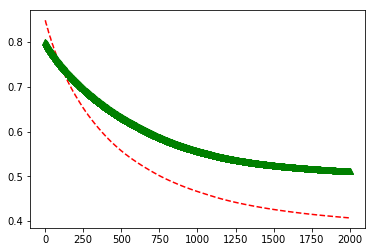

In [45]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

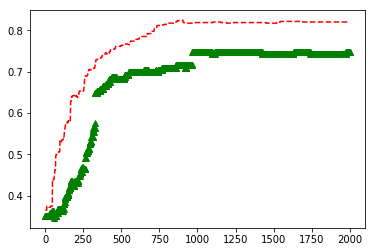

In [46]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [47]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_predict)
test_predict_result=test_predict_result.astype(np.int32)
test_predict_result[:10]

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [48]:
passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=test_predict_result
evaluation[:10]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [49]:
evaluation.to_csv("results.csv",index=False)

Score: 0.77990